# Understanding Underfitting and Overfitting in Housing Price Prediction

This notebook demonstrates different scenarios of underfitting and overfitting using the California housing dataset. We'll explore:

1. Simple Linear Regression with Single Feature (Underfitting)
2. Linear Regression with All Features (Balanced)
3. Polynomial Regression with Different Degrees (Overfitting)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

## Load and Prepare Data

In [3]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Handle missing values
df = df.dropna()

# Convert categorical variables
df = pd.get_dummies(df, columns=['ocean_proximity'])

# Separate features and target
X = df.drop('median_house_value',axis = 1)
y = df['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scenario 1: Underfitting - Simple Linear Regression with Single Feature

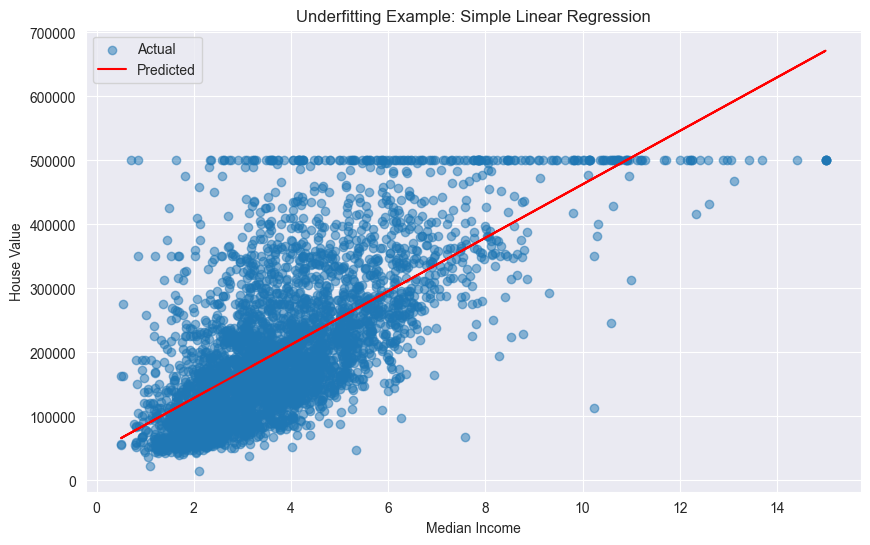

R² Score (Simple Model): 0.472


In [4]:
# Use only median_income as feature
X_simple = X_train[['median_income']]
X_test_simple = X_test[['median_income']]

# Train model
model_simple = LinearRegression()
model_simple.fit(X_simple,y_train)

# Make predictions
y_pred_simple = model_simple.predict(X_test_simple)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, alpha=0.5, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Underfitting Example: Simple Linear Regression')
plt.legend()
plt.show()

print(f'R² Score (Simple Model): {r2_score(y_test, y_pred_simple):.3f}')

## Scenario 2: Balanced Model - Linear Regression with All Features

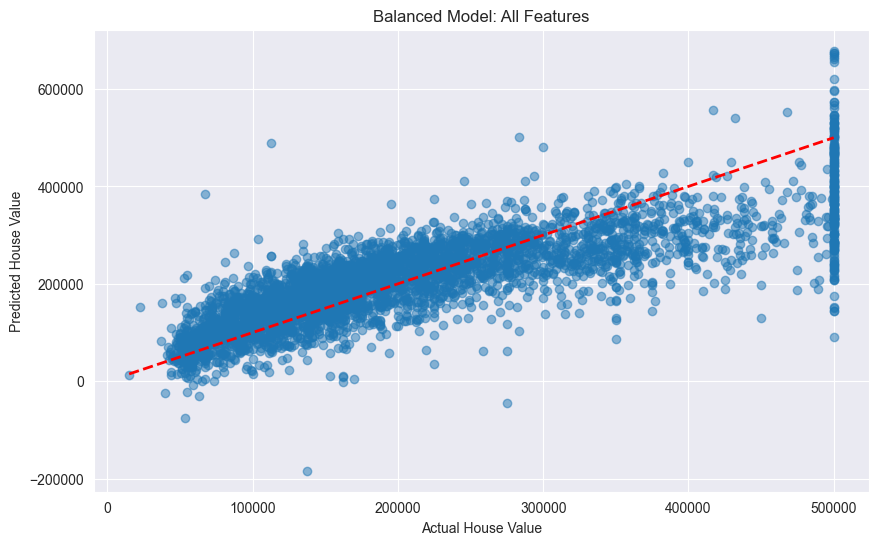

R² Score (Full Model): 0.64884


In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model_full = LinearRegression()
model_full.fit(X_train_scaled,y_train)

# Make predictions
y_pred_full = model_full.predict(X_test_scaled)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_full, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Balanced Model: All Features')
plt.show()

print(f'R² Score (Full Model): {r2_score(y_test, y_pred_full):.5f}')

## Scenario 3: Overfitting - Polynomial Regression with Different Degrees

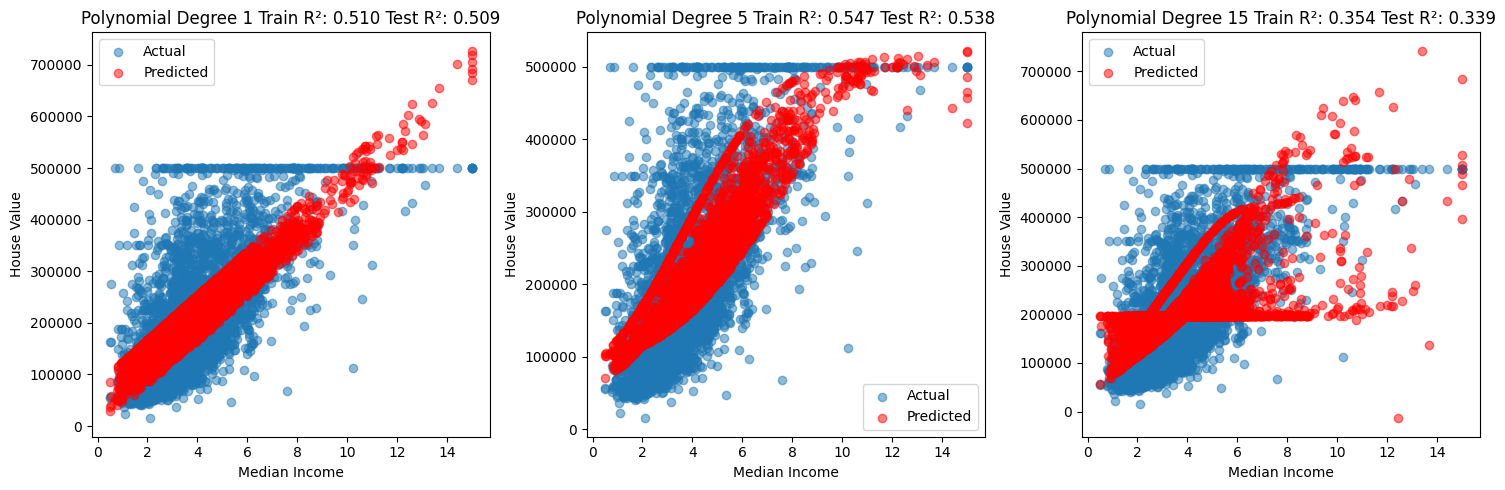

In [ ]:
# Use two features for visualization
X_poly = X_train[['median_income', 'housing_median_age']]
X_test_poly = X_test[['median_income', 'housing_median_age']]

# Train models with different polynomial degrees
degrees = [1, 5, 15]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly =

    
    # Train model
    model_poly = LinearRegression()
    model_poly.fit(X_poly_features, y_train)
    
    # Make predictions
    y_pred_poly = model_poly.predict(X_test_poly_features)
    
    # Calculate scores
    train_score = r2_score(y_train, model_poly.predict(X_poly_features))
    test_score = r2_score(y_test, y_pred_poly)
    
    # Plot results
    plt.subplot(1, 3, i)
    plt.scatter(X_test_poly['median_income'], y_test, alpha=0.5, label='Actual')
    plt.scatter(X_test_poly['median_income'], y_pred_poly, color='red', alpha=0.5, label='Predicted')
    plt.xlabel('Median Income')
    plt.ylabel('House Value')
    plt.title(f'Polynomial Degree {degree} Train R²: {train_score:.3f} Test R²: {test_score:.3f}')
    plt.legend()

plt.tight_layout()
plt.show()

## Analysis of Results

1. **Underfitting (Scenario 1)**:
   - Using only one feature (median_income) results in high bias
   - The model is too simple to capture the complexity of house prices
   - Low R² score indicates poor fit

2. **Balanced Model (Scenario 2)**:
   - Using all features with linear regression provides better balance
   - Model captures more patterns without overfitting
   - Improved R² score compared to the simple model

3. **Overfitting (Scenario 3)**:
   - Higher degree polynomials show increasing training accuracy
   - Test performance degrades with higher degrees
   - Model becomes too complex and fits noise in the data


## Cost functions with regularization
### Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 



$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    


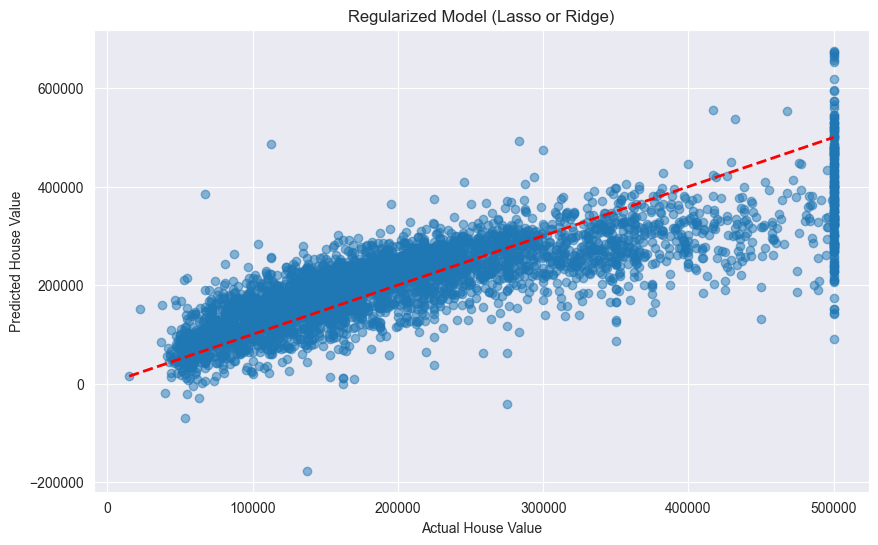

R² Score (Regularized Model): 0.64873


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
# Choose one of the following regularized models:

# model = Ridge(alpha=1)   # L2 regularization
model = Lasso(alpha=100)    # L1 regularization
# Train model
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_full = model.predict(X_test_scaled)

# alphas = [0.01, 0.1, 1, 10, 100]  # Different values to try
# model = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
# model.fit(X_train_scaled, y_train)
# y_pred_full = model.predict(X_test_scaled)
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_full, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Regularized Model (Lasso or Ridge)')
plt.show()




print(f'R² Score (Regularized Model): {r2_score(y_test, y_pred_full):.5f}')
